In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [2]:
base_path = '/Users/siddharthchaudhary/Documents/git_repos/AI-Models/Numeric_text_classifier/'

In [3]:
dataset = (pd.read_csv(base_path + 'Womens_clothing_reviews.csv')
           .drop(['Unnamed: 0', 'Clothing ID'],axis = 1))
dataset.head()

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
dataset.describe()

,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000
mean,43.198544,4.196032,0.822362,2.535936
std,12.279544,1.110031,0.382216,5.702202
min,18.000000,1.000000,0.000000,0.000000
25%,34.000000,4.000000,1.000000,0.000000
50%,41.000000,5.000000,1.000000,1.000000
75%,52.000000,5.000000,1.000000,3.000000
max,99.000000,5.000000,1.000000,122.000000


In [5]:
dataset.shape

(23486, 9)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      23486 non-null  int64 
 1   Title                    19676 non-null  object
 2   Review Text              22641 non-null  object
 3   Rating                   23486 non-null  int64 
 4   Recommended IND          23486 non-null  int64 
 5   Positive Feedback Count  23486 non-null  int64 
 6   Division Name            23472 non-null  object
 7   Department Name          23472 non-null  object
 8   Class Name               23472 non-null  object
dtypes: int64(4), object(5)
memory usage: 1.6+ MB


In [7]:
[column for column in dataset.columns if dataset[column].isnull().sum()>0]

['Title', 'Review Text', 'Division Name', 'Department Name', 'Class Name']

In [8]:
dataset.isnull().sum()

Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [9]:
dataset['Division Name'] = dataset['Division Name'].str.strip()
dataset['Department Name'] = dataset['Department Name'].str.strip()
dataset['Class Name'] = dataset['Class Name'].str.strip()

In [10]:
dataset[['Class Name']].isnull().sum()

Class Name    14
dtype: int64

## Visualisation
##### 1. missing value 

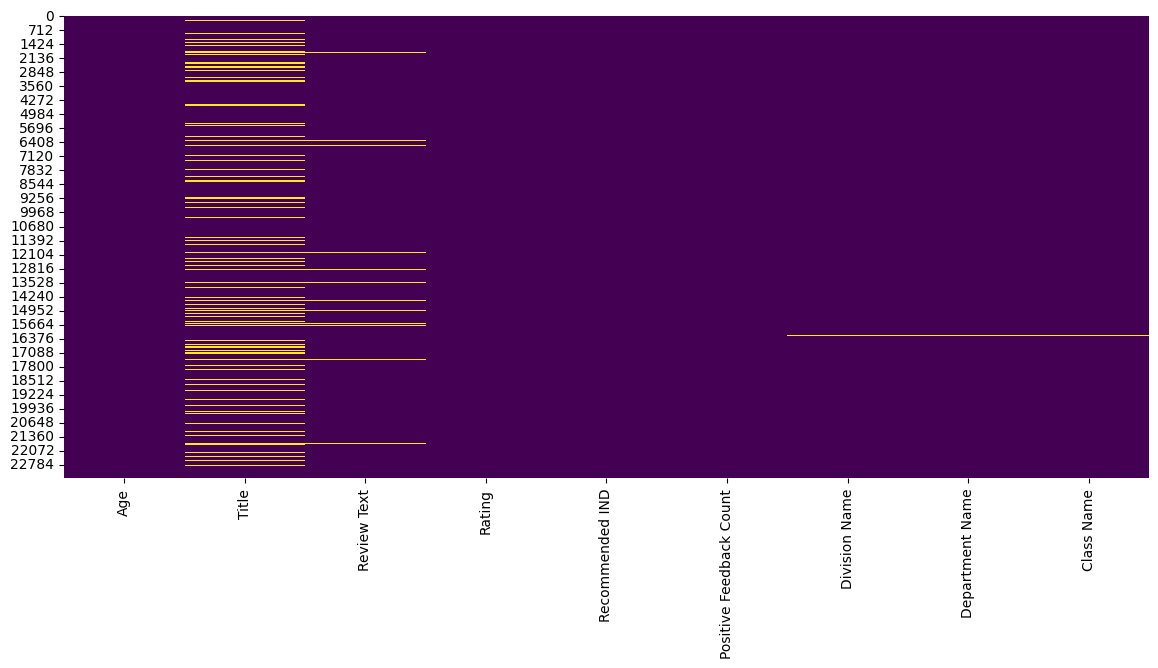

In [11]:
matplotlib.rcParams['figure.figsize'] = (14, 6)
sns.heatmap(dataset.isnull(), cbar=False, cmap='viridis')
plt.show()

In [12]:
dataset = dataset.dropna(axis = 0, how ='any')
dataset.head()

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


In [13]:
## Visualisation
#2. Box plot for outliers

In [14]:
dataset.dtypes

Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [15]:
numerical_features = dataset.select_dtypes(exclude=["object"])

In [16]:
len(numerical_features.columns)

4

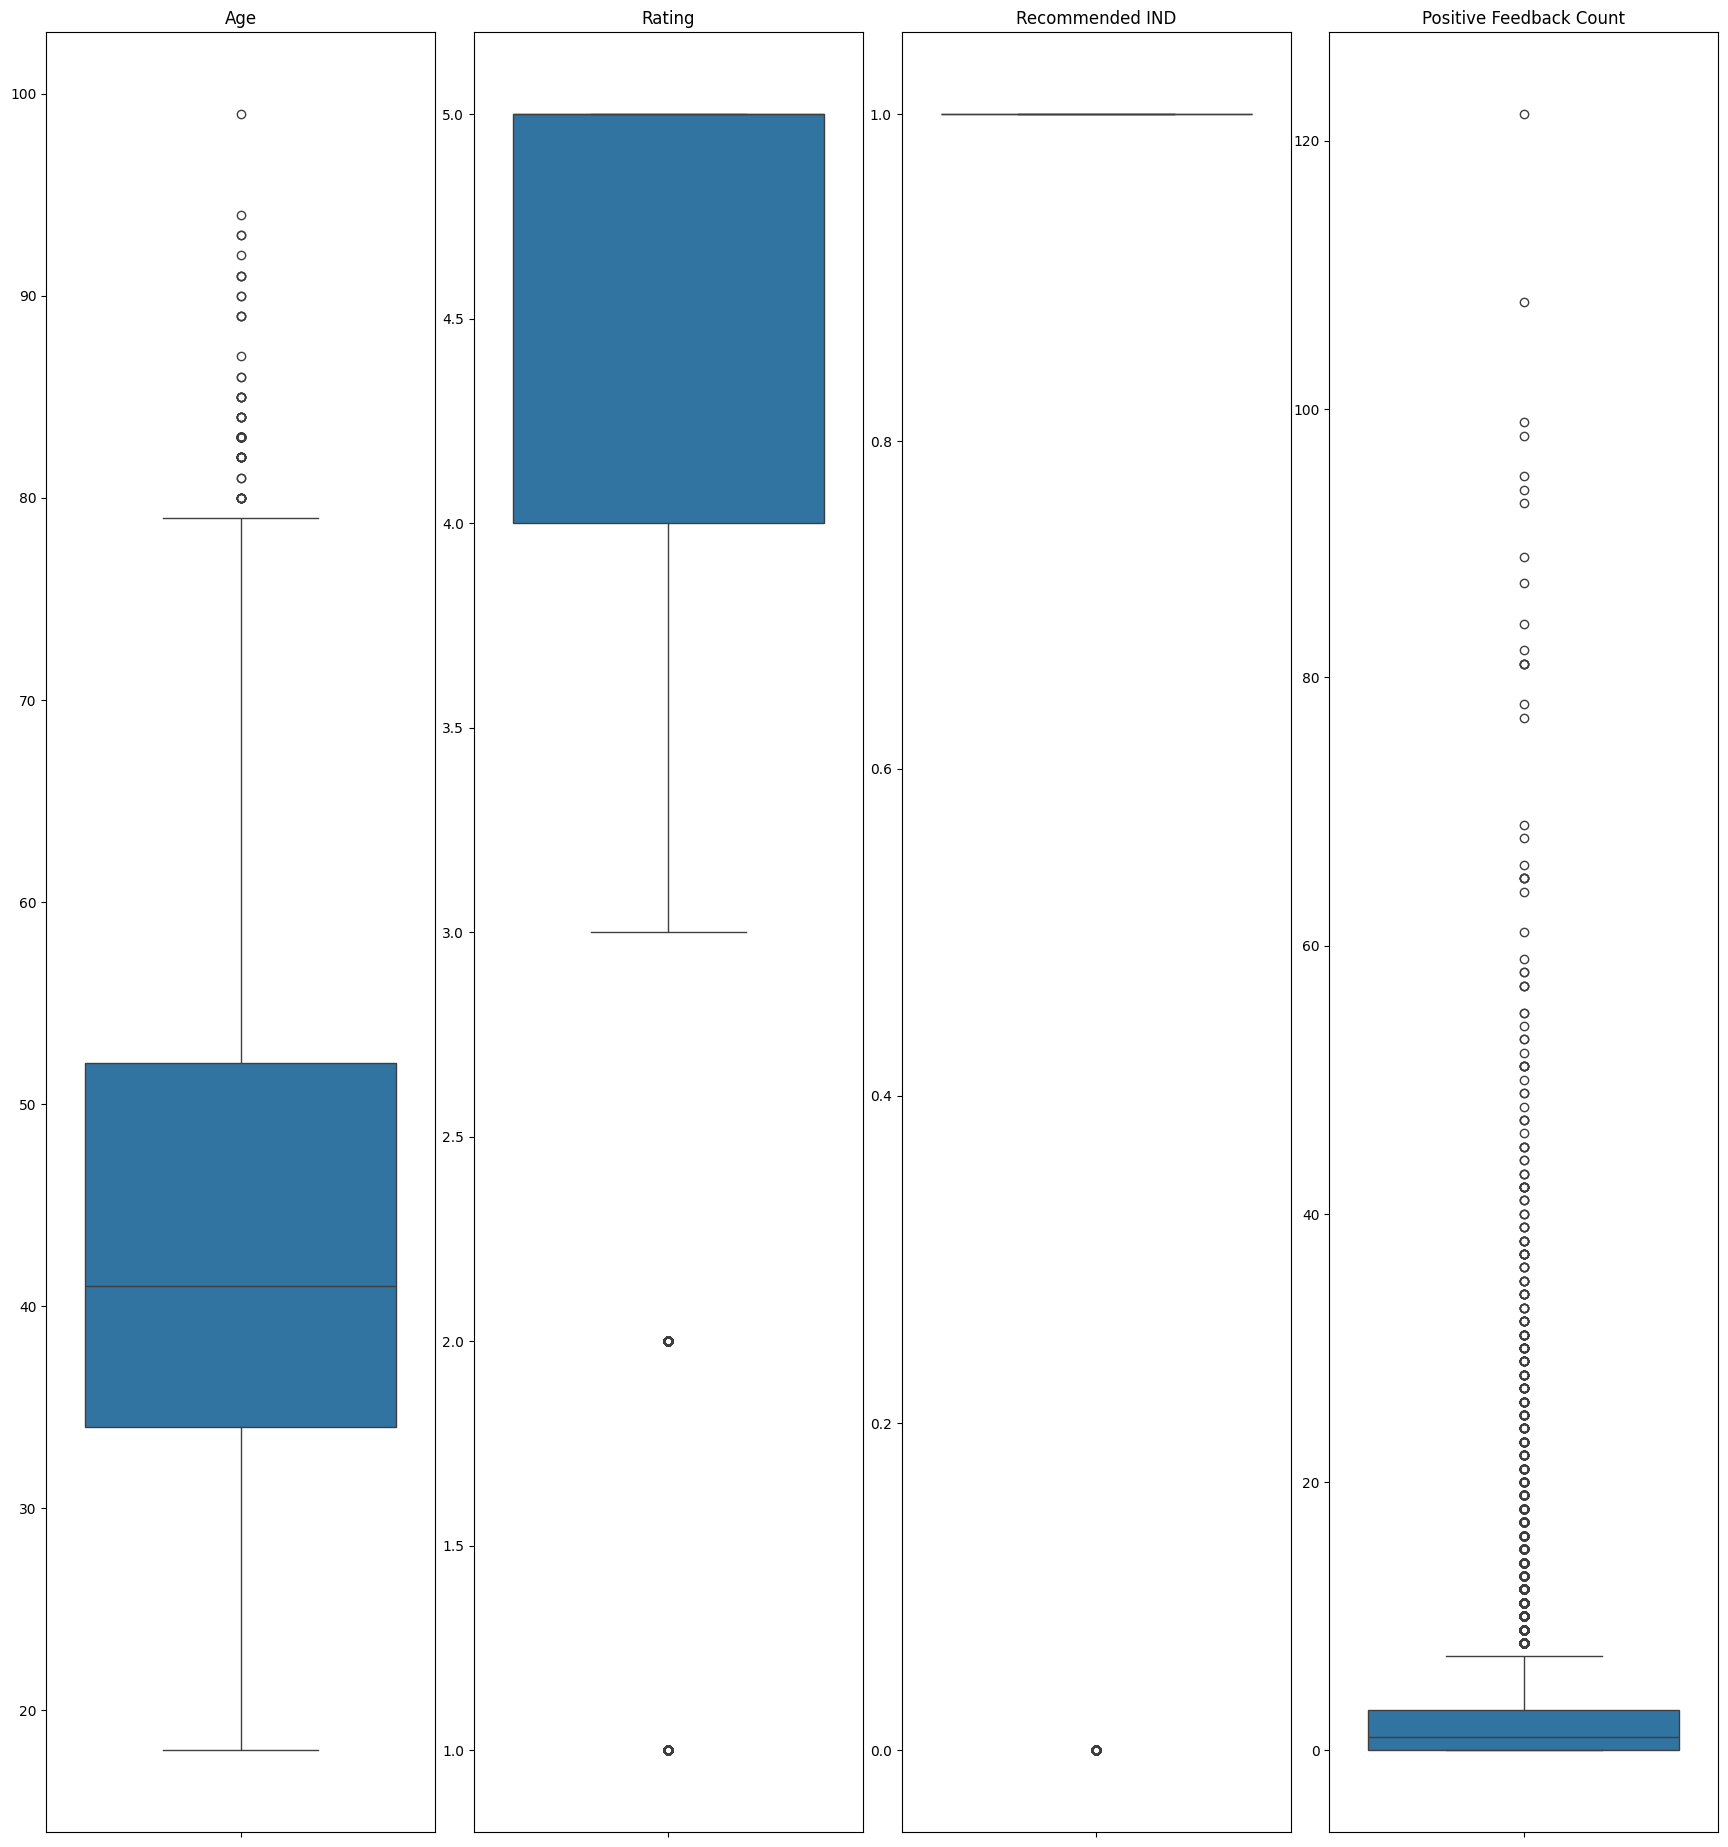

In [17]:
matplotlib.rcParams['figure.figsize'] = (15, 20)
for i, feature in enumerate(numerical_features):
    plt.subplot(1, 5, i+1 )
    sns.boxplot(dataset[feature].values)
    plt.title(feature)
    plt.subplots_adjust(left=0.1, 
                        bottom=0.1,
                        right=1.5,
                        top=1,
                        wspace=0.1, 
                        hspace=0.9)
plt.show()

In [18]:
## Visualisation
#2.Dist plot and Hist plot

/var/folders/m9/4zyv95j550325mwdg_3jgj2m0000gn/T/ipykernel_6503/91124801.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[feature], bins = 20)
/var/folders/m9/4zyv95j550325mwdg_3jgj2m0000gn/T/ipykernel_6503/91124801.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[feature],

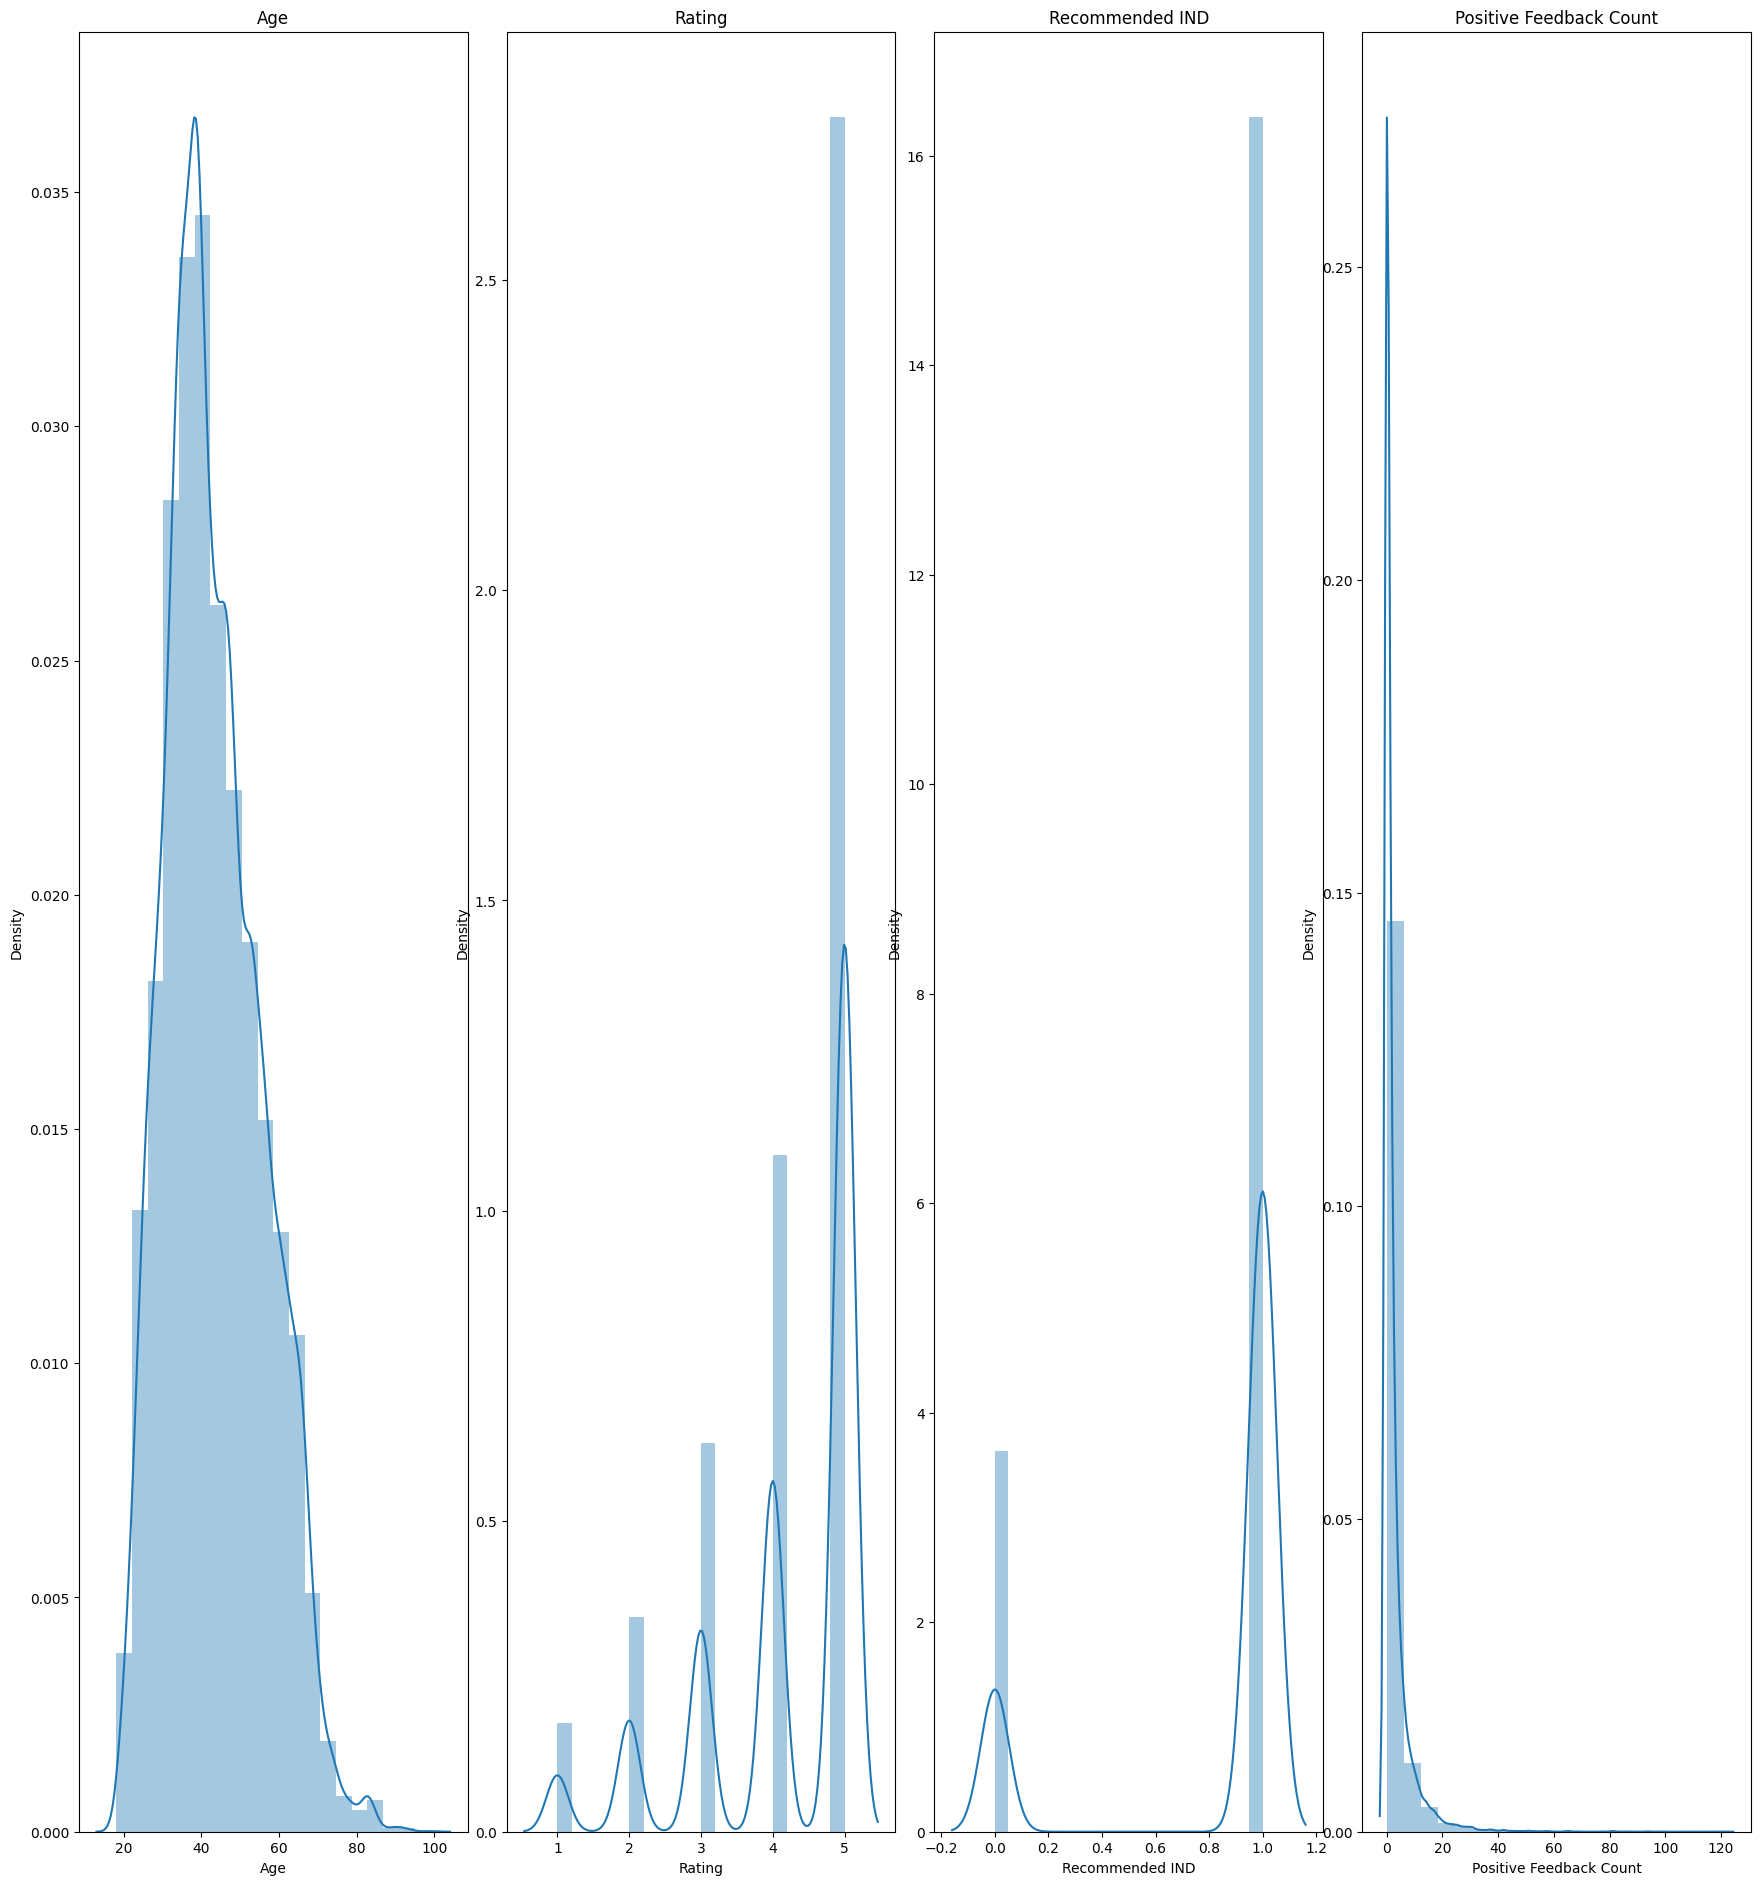

In [19]:
matplotlib.rcParams['figure.figsize'] = (15, 20)
for i,feature in enumerate(numerical_features):
    plt.subplot(1,5,i+1)
    sns.distplot(dataset[feature], bins = 20)
    plt.title(feature)
    plt.subplots_adjust(left=0.1, 
                        bottom=0.1,
                        right=1.5,
                        top=1,
                        wspace=0.1, 
                        hspace=0.9)
plt.show()

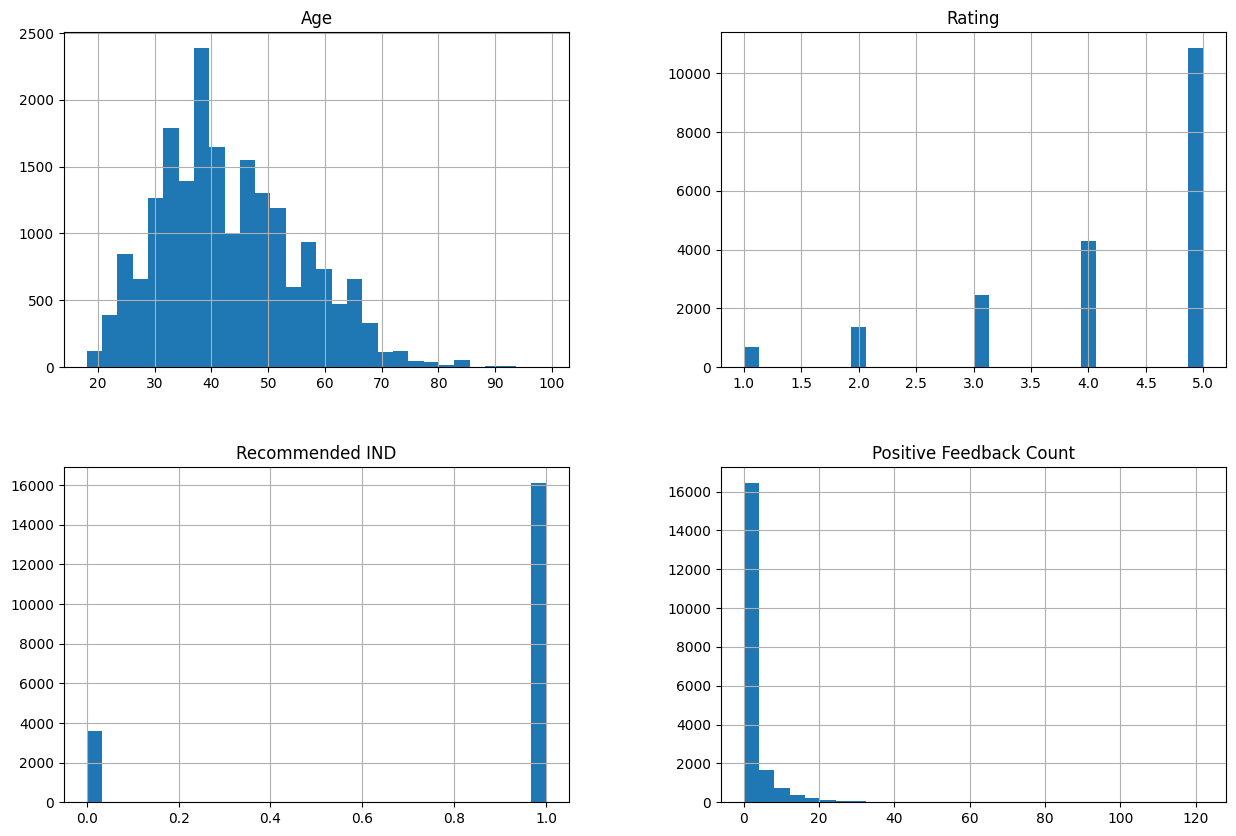

In [20]:
numerical_features.hist(bins = 30,
                       figsize=(15,10))
plt.show()

In [21]:
numerical_features.nunique()

Age                        77
Rating                      5
Recommended IND             2
Positive Feedback Count    79
dtype: int64

In [22]:
## Visualisation
#3. Correlation Matrix

In [26]:
numerical_features.corr()

,Age,Rating,Recommended IND,Positive Feedback Count
Age,1.000000,0.034910,0.035407,0.041167
Rating,0.034910,1.000000,0.793145,-0.056659
Recommended IND,0.035407,0.793145,1.000000,-0.059452
Positive Feedback Count,0.041167,-0.056659,-0.059452,1.000000


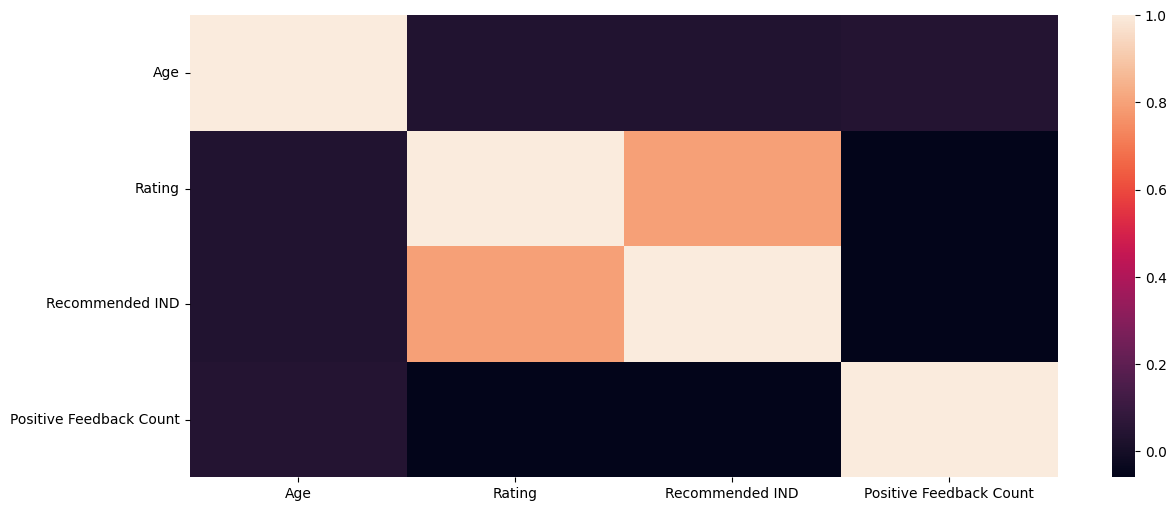

In [27]:
matplotlib.rcParams['figure.figsize'] = (14, 6)
sns.heatmap(numerical_features.corr())
plt.show()

## DATA ANALYSIS

In [28]:
Non_text_data = dataset[['Age', 'Rating', 'Recommended IND', 'Positive Feedback Count', 
                         'Division Name', 'Department Name', 'Class Name']]

In [29]:
Non_text_data.nunique()

Age                        77
Rating                      5
Recommended IND             2
Positive Feedback Count    79
Division Name               3
Department Name             6
Class Name                 20
dtype: int64

In [30]:
#### 1. Which age group gave most positive recommendation?

In [31]:
potv_rev_age = dataset.groupby('Age')['Recommended IND'].sum().reset_index(name='counts')

/var/folders/m9/4zyv95j550325mwdg_3jgj2m0000gn/T/ipykernel_6503/2837123681.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=potv_rev_age, x="Age", y="counts", palette="viridis")


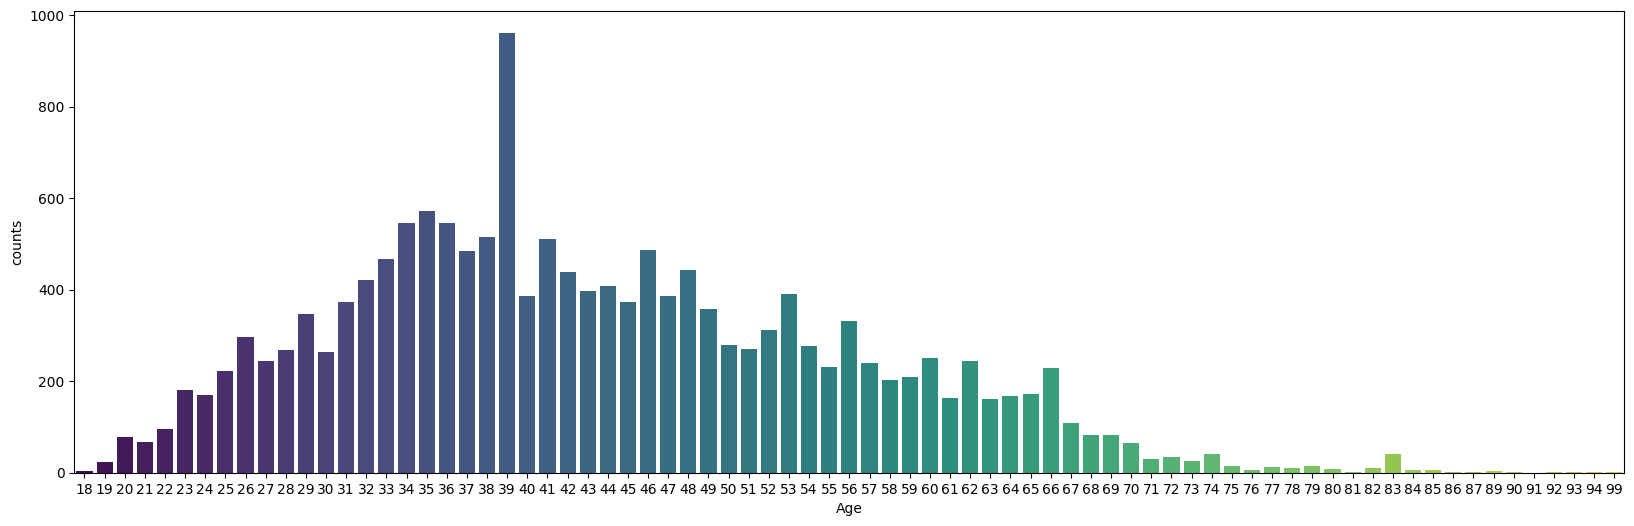

In [65]:
matplotlib.rcParams['figure.figsize'] = (20, 6)
sns.barplot(data=potv_rev_age, x="Age", y="counts", palette="viridis")
plt.show()

In [33]:
### Observation:- Age 39 gave most positive recommendation.

In [34]:
# 2. Rating and Recommendation?

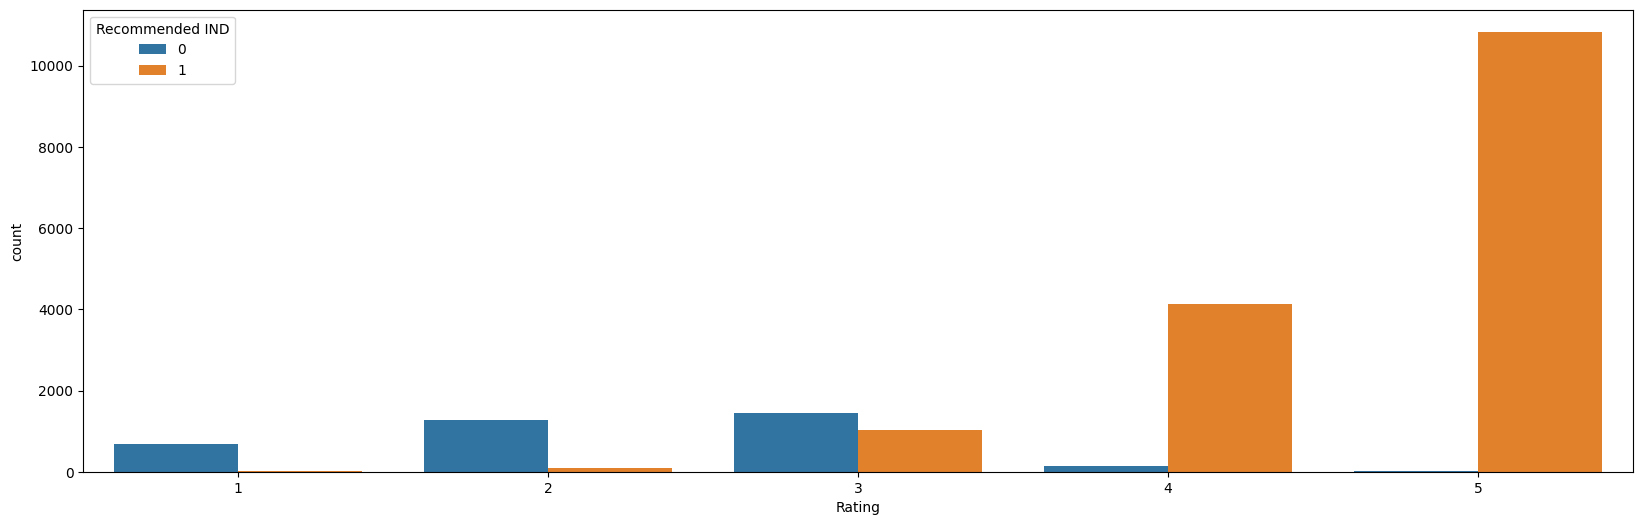

In [35]:
matplotlib.rcParams['figure.figsize'] = (20, 6)
sns.countplot(data=dataset, x="Rating", hue="Recommended IND")
plt.show()

In [36]:
dataset.groupby(['Rating','Recommended IND']).size().reset_index(name='recomnd_counts')

,Rating,Recommended IND,recomnd_counts
0,1,0,684
1,1,1,7
2,2,0,1280
3,2,1,80
4,3,0,1444
5,3,1,1020
6,4,0,146
7,4,1,4143
8,5,0,21
9,5,1,10837


In [37]:
### Observation:- More rating means most positive recommendation.

In [38]:
# 3 which department got most positive recomendation

In [39]:
potv_rec_division = dataset.groupby('Division Name')['Recommended IND'].sum().reset_index(name='Pos_rec_counts')
potv_rec_division.head()

,Division Name,Pos_rec_counts
0,General,9490
1,General Petite,5563
2,Initmates,1034


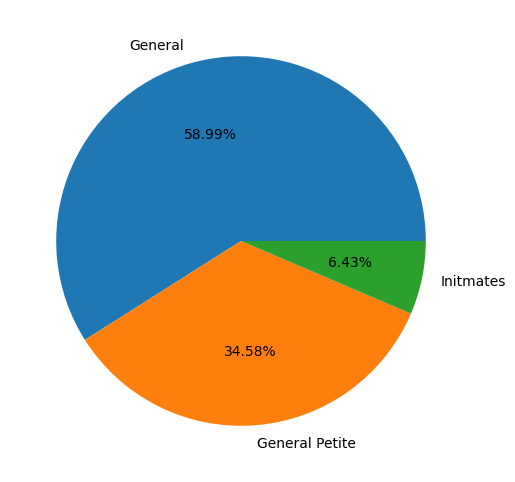

In [40]:
plt.pie(potv_rec_division['Pos_rec_counts'].values, 
        labels = potv_rec_division['Division Name'].values, autopct='%1.2f%%')
plt.show()

## Preprocessing -> train,test,split

In [41]:
dataset = (pd.read_csv(base_path + 'Womens_clothing_reviews.csv')
           .drop(['Unnamed: 0', 'Clothing ID'],axis = 1)
           .rename(columns = {'Recommended IND':'labels'}))
dataset.head()

,Age,Title,Review Text,Rating,labels,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [42]:
dataset = dataset.dropna(axis = 0, how ='any').reset_index()
dataset.shape

(19662, 10)

In [43]:
dataset["text"] = dataset['Title'].astype(str) +"- "+ dataset["Review Text"]
dataset = dataset.drop(['Title', 'index', 'Review Text'], axis=1)
dataset.head()

,Age,Rating,labels,Positive Feedback Count,Division Name,Department Name,Class Name,text
0,60,3,0,0,General,Dresses,Dresses,Some major design flaws- I had such high hopes...
1,50,5,1,0,General Petite,Bottoms,Pants,"My favorite buy!- I love, love, love this jump..."
2,47,5,1,6,General,Tops,Blouses,Flattering shirt- This shirt is very flatterin...
3,49,2,0,4,General,Dresses,Dresses,Not for the very petite- I love tracy reese dr...
4,39,5,1,1,General Petite,Tops,Knits,Cagrcoal shimmer fun- I aded this in my basket...


In [44]:
dataset_encoded = pd.get_dummies(dataset, columns = ['Division Name','Department Name', 'Class Name'])
dataset_encoded.head()

,Age,Rating,labels,Positive Feedback Count,text,Division Name_General,Division Name_General Petite,Division Name_Initmates,Department Name_Bottoms,Department Name_Dresses,...,Class Name_Legwear,Class Name_Lounge,Class Name_Outerwear,Class Name_Pants,Class Name_Shorts,Class Name_Skirts,Class Name_Sleep,Class Name_Sweaters,Class Name_Swim,Class Name_Trend
0,60,3,0,0,Some major design flaws- I had such high hopes...,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,50,5,1,0,"My favorite buy!- I love, love, love this jump...",False,True,False,True,False,...,False,False,False,True,False,False,False,False,False,False
2,47,5,1,6,Flattering shirt- This shirt is very flatterin...,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,49,2,0,4,Not for the very petite- I love tracy reese dr...,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,39,5,1,1,Cagrcoal shimmer fun- I aded this in my basket...,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [45]:
len(dataset_encoded)

19662

In [46]:
19662 - 1966 -984

16712

In [47]:
train_data, val_df, test_df = np.split(dataset_encoded.sample(frac=1), [int(.85*len(dataset_encoded)), int(.95 * len(dataset_encoded))])
print('Num examples train-val-test')
print(len(train_data), len(val_df), len(test_df))

Num examples train-val-test
16712 1966 984


/opt/anaconda3/envs/cat_num_text/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [48]:
train_data.head()

,Age,Rating,labels,Positive Feedback Count,text,Division Name_General,Division Name_General Petite,Division Name_Initmates,Department Name_Bottoms,Department Name_Dresses,...,Class Name_Legwear,Class Name_Lounge,Class Name_Outerwear,Class Name_Pants,Class Name_Shorts,Class Name_Skirts,Class Name_Sleep,Class Name_Sweaters,Class Name_Swim,Class Name_Trend
2013,31,4,1,7,"Beautiful, but a bit boxy- I really wanted to ...",False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
14011,40,4,1,3,Swingy and light- Swing dresses are the holy g...,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
12692,41,5,1,0,Pretty!- Love! love! love this tunic! i was wo...,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
17002,36,5,1,4,My new favorite jeans!- I cannot say enough ex...,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
13968,63,5,1,3,Love!- This chambray is super soft! it has suc...,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [49]:
train_data['labels'].value_counts()

labels
1    13678
0     3034
Name: count, dtype: int64

In [50]:
pos = train_data[train_data['labels'] == 1].sample(n=3011)
neg = train_data[train_data['labels'] == 0].sample(n=3011)
train_df = pd.concat([pos,neg])
train_df.reset_index(inplace=True, drop=True)
len(pos), len(neg) , len(train_df)

(3011, 3011, 6022)

In [51]:
train_df.head()

,Age,Rating,labels,Positive Feedback Count,text,Division Name_General,Division Name_General Petite,Division Name_Initmates,Department Name_Bottoms,Department Name_Dresses,...,Class Name_Legwear,Class Name_Lounge,Class Name_Outerwear,Class Name_Pants,Class Name_Shorts,Class Name_Skirts,Class Name_Sleep,Class Name_Sweaters,Class Name_Swim,Class Name_Trend
0,56,4,1,2,Very pretty- This top is very pretty. it's a b...,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,22,5,1,2,Need to see this in person- The photo does a d...,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,46,5,1,0,Love it!- I love this dress. the quality of th...,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,38,5,1,12,Lovely dress and fit- This dress is extremely ...,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,42,4,1,0,Great transition to fall- I really like this s...,False,True,False,True,False,...,False,False,False,False,False,True,False,False,False,False


In [52]:
train_data.sample(frac=1).to_csv(base_path + 'train_data.csv', index = False)
train_df.sample(frac=1).to_csv(base_path + 'train.csv', index = False)
val_df.sample(frac=1).to_csv(base_path + 'val.csv', index = False)
test_df.sample(frac=1).to_csv(base_path + 'test.csv', index = False)

In [53]:
train_data = pd.read_csv(base_path + 'train_data.csv')
train_df = pd.read_csv(base_path + 'train.csv')
val_df = pd.read_csv(base_path + 'val.csv')
test_df = pd.read_csv(base_path + 'test.csv')

In [54]:
train_data.head()

,Age,Rating,labels,Positive Feedback Count,text,Division Name_General,Division Name_General Petite,Division Name_Initmates,Department Name_Bottoms,Department Name_Dresses,...,Class Name_Legwear,Class Name_Lounge,Class Name_Outerwear,Class Name_Pants,Class Name_Shorts,Class Name_Skirts,Class Name_Sleep,Class Name_Sweaters,Class Name_Swim,Class Name_Trend
0,39,5,1,0,Simple but beautiful- This shirt is really cut...,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,38,3,1,2,Amazingly soft and comfy but...- This is so so...,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,51,4,1,0,Lovely- Falls beautifully and the color is vib...,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,41,5,1,6,Gorgeous!!- Easy breezy summer dress!!! love t...,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,36,4,1,0,Light and comfy- These pants are very comforta...,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False


In [55]:
len(train_df)

6022

In [56]:
test_df['labels'].value_counts()

labels
1    792
0    192
Name: count, dtype: int64

In [57]:
pos = test_df[test_df['labels'] == 1].sample(n=176)
neg = test_df[test_df['labels'] == 0].sample(n=176)
test_blncd_df = pd.concat([pos,neg])
test_blncd_df.reset_index(inplace=True, drop=True)
len(pos), len(neg) , len(test_blncd_df)
test_blncd_df.sample(frac=1).to_csv(base_path + 'test_blncd_df.csv', index = False)

In [58]:
test_blncd_df = pd.read_csv(base_path + 'test_blncd_df.csv')
test_blncd_df.head()

,Age,Rating,labels,Positive Feedback Count,text,Division Name_General,Division Name_General Petite,Division Name_Initmates,Department Name_Bottoms,Department Name_Dresses,...,Class Name_Legwear,Class Name_Lounge,Class Name_Outerwear,Class Name_Pants,Class Name_Shorts,Class Name_Skirts,Class Name_Sleep,Class Name_Sweaters,Class Name_Swim,Class Name_Trend
0,33,3,1,5,Petite ladies avoid!- I fell in love with this...,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,54,2,0,4,Cute top- I ordered this top because it was 10...,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,32,2,0,0,"Not for my hips- I'm 140 at 5' 8"". pear shape....",True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
3,39,2,0,10,"Way too small- This is a beautiful skirt, but ...",True,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
4,25,4,1,3,Beautiful fall sweater- This top is really cut...,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
